# Projeto - Cálculo

## Imports

In [1]:
%pip install latexify-py
%pip install ffmpeg-python

ERROR: Ignored the following versions that require a different python version: 0.0.4 Requires-Python >=3.6, <3.9; 0.0.5 Requires-Python >=3.6, <3.9; 0.0.6 Requires-Python >=3.6, <3.9; 0.0.7 Requires-Python >=3.6, <3.9; 0.1.0 Requires-Python <3.11,>=3.7; 0.1.1 Requires-Python <3.11,>=3.7; 0.2.0 Requires-Python <3.11,>=3.7; 0.2.0b1 Requires-Python <3.11,>=3.7; 0.2.0b2 Requires-Python <3.11,>=3.7
ERROR: Could not find a version that satisfies the requirement latexify-py (from versions: none)
ERROR: No matching distribution found for latexify-py

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 4.1 MB/s eta 0:00:004.5 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  DEPRECATION: future is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and t

In [5]:
import math

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import rc

## Código

### Criando o ambiente 3d e o espaço vetorial

In [14]:
def F(r, theta):
    return np.array([r*math.cos(theta), r*math.sin(theta), r*math.sin(r)])

In [15]:
def normalize(F):
    return F / np.linalg.norm(F)

In [16]:
def setnorm(F, norm):
    return F * norm

/tmp/ipykernel_25863/4234996280.py:16: RuntimeWarning: invalid value encountered in arcsin
  ax.quiver(x, y, 0, *setnorm(normalize(F(r, np.arcsin(y/r))), 0.2))


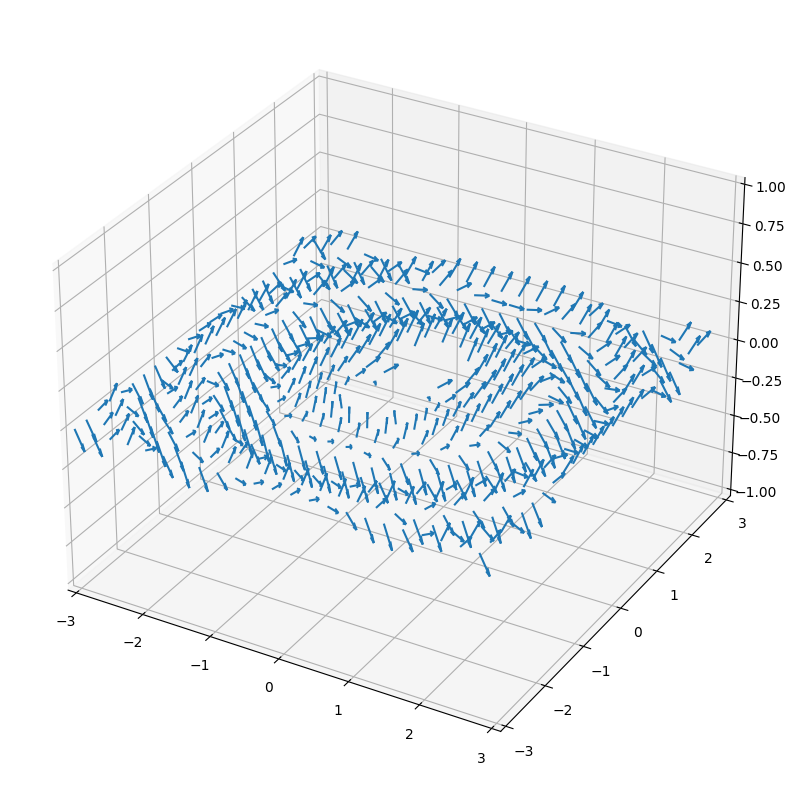

In [17]:
n = 23

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

xlow = -3
xhigh = 3
ylow = -3
yhigh = 3

for i in range(n):
    for j in range(n):
        x = xlow + (xhigh - xlow)/n*i
        y = ylow + (yhigh - ylow)/n*j
        r = x**2 + y**2
        ax.quiver(x, y, 0, *setnorm(normalize(F(r, np.arcsin(y/r))), 0.2))
ax.set_xlim([xlow, xhigh])
ax.set_ylim([ylow, yhigh])
ax.set_zlim([-1, 1])
plt.show()

/tmp/ipykernel_25863/94029154.py:20: RuntimeWarning: invalid value encountered in arcsin
  ax.quiver(x, y, z, *setnorm(normalize(F(r, np.arcsin(y/r))), 0.2))


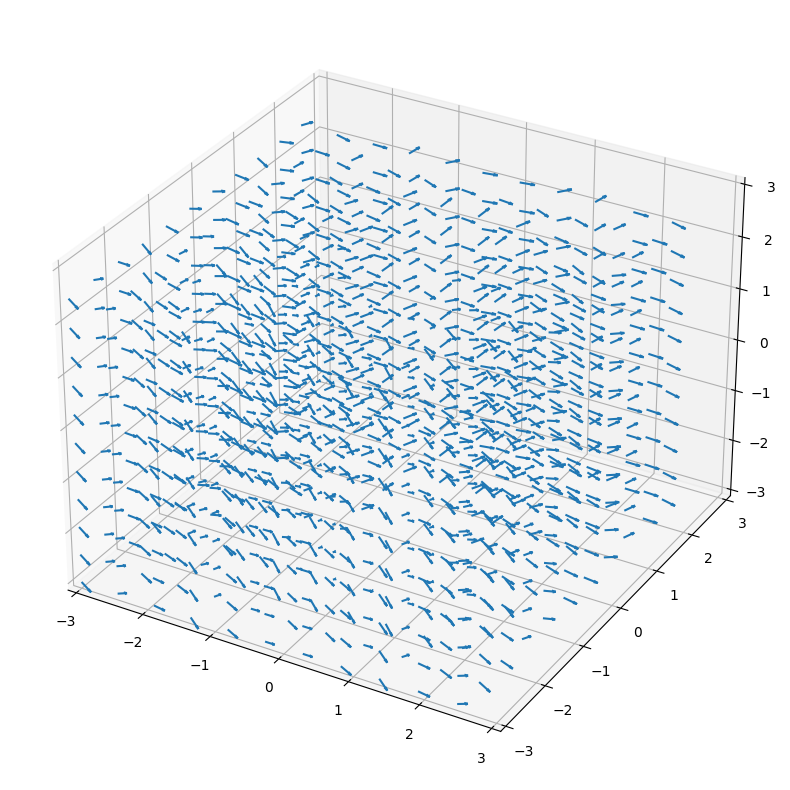

In [18]:
n = 11

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

xlow = -3
xhigh = 3
ylow = -3
yhigh = 3
zlow = -3
zhigh = 3

for i in range(n):
    for j in range(n):
        for k in range(n):
            x = xlow + (xhigh - xlow)/n*i
            y = ylow + (yhigh - ylow)/n*j
            z = zlow + (zhigh - zlow)/n*k
            r = x**2 + y**2
            ax.quiver(x, y, z, *setnorm(normalize(F(r, np.arcsin(y/r))), 0.2))
ax.set_xlim([xlow, xhigh])
ax.set_ylim([ylow, yhigh])
ax.set_zlim([zlow, zhigh])
plt.show()

## Adicionando partículas ao espaço vetorial

In [20]:
class Particle:
    def __init__(self, x, y, z):
        self.pos = np.array([x, y, z])
        self.vel = np.array([0, 0, 0])
        self.r = self.pos[0]**2 + self.pos[1]**2 + self.pos[2]**2
        self.acc = F(self.r, np.arcsin(self.pos[1]/self.r))
    
    def update(self):
        self.pos = self.pos + self.vel
        self.vel = self.vel + self.acc
        self.r = self.pos[0]**2 + self.pos[1]**2+ self.pos[2]**2
        print(np.arcsin(self.pos[1]/self.r))
        self.acc = F(self.r, np.arcsin(self.pos[1]/self.r))

In [21]:
# Crio 900 partículas uniformemente espaçadas em um espaço [-3, 3] x [-3, 3] (z = 0)

particles = []
n = 33

for i in range(n):
    for j in range(n):
        x = xlow + (xhigh - xlow)/n*i
        y = ylow + (yhigh - ylow)/n*j
        particles.append(Particle(x, y, 0))

/tmp/ipykernel_25863/3674626808.py:6: RuntimeWarning: invalid value encountered in arcsin
  self.acc = F(self.r, np.arcsin(self.pos[1]/self.r))


In [22]:
# Atualizo todas as partículas
def updateParticles(particles):
    for i in range(len(particles)):
        particles[i].update()

In [23]:
# Desenho um frame da animação
def drawParticles(n):
    updateParticles(particles)

    for particle in particles:
        ax.scatter(*particle.pos, c='black')
    ax.set_xlim([xlow, xhigh])
    ax.set_ylim([ylow, yhigh])
    ax.set_zlim([zlow, zhigh])
    
    return (ax,)

In [24]:
drawParticles(particles)

-0.16744807921968932
-0.16711827211215546
-0.16604695264959488
-0.16410187373782123
-0.16113986351785234
-0.15701019695448656
-0.15155995879121054
-0.1446417510908438
-0.13612391912461558
-0.12590314044081494
-0.11391873249481894
-0.1001674211615598
-0.08471668234756896
-0.06771430161265142
-0.04939171349081655
-0.030059171283873504
-0.010091914423152257
0.010091914423152257
0.030059171283873552
0.04939171349081655
0.06771430161265148
0.08471668234756896
0.1001674211615598
0.11391873249481894
0.12590314044081494
0.1361239191246156
0.14464175109084382
0.15155995879121054
0.15701019695448656
0.16113986351785234
0.16410187373782126
0.1660469526495949
0.16711827211215546
-0.17801182834143156
-0.17836358192964308
-0.17796342004628177
-0.17665705614214838
-0.17427298592340656
-0.17062535643114238
-0.16551936701225595
-0.1587598730678149
-0.15016370779164642
-0.139575850885482
-0.1268889005424777
-0.1120643558454439
-0.09515311984080022
-0.07631166866119782
-0.05580990081968265
-0.03402718456

/tmp/ipykernel_25863/3674626808.py:12: RuntimeWarning: invalid value encountered in arcsin
  print(np.arcsin(self.pos[1]/self.r))
/tmp/ipykernel_25863/3674626808.py:13: RuntimeWarning: invalid value encountered in arcsin
  self.acc = F(self.r, np.arcsin(self.pos[1]/self.r))


(<Axes3D: >,)

-0.013754309118672668
-0.011857586178425744
-0.025780682730055352
-0.019340796990117037
-0.013300630054881508
-0.019480396572765086
-0.03609664570810278
-0.025799472912516594
-0.016367603424254175
-0.014852961085524866
-0.017766257920351247
-0.024423451168608893
-0.0313635316670562
-0.03001993829992962
-0.021055077695276685
-0.011643108360653293
-0.003679847756219711
0.003679847756219711
0.011643108360653312
0.021055077695276685
0.03001993829992964
0.0313635316670562
0.024423451168608893
0.017766257920351247
0.014852961085524866
0.016367603424254182
0.025799472912516597
0.03609664570810278
0.019480396572765086
0.013300630054881508
0.019340796990117058
0.025780682730055324
0.011857586178425744
-0.01240422375731222
-0.027668768741194245
-0.01846865919412499
-0.014739375628439255
-0.027049959176217907
-0.03677283000001415
-0.02106596189506804
-0.017785745506053326
-0.02371593536940631
-0.04017900819806226
-0.04949478750498469
-0.0344641760698371
-0.021839711129677638
-0.014802841402575128

/tmp/ipykernel_25863/3674626808.py:12: RuntimeWarning: invalid value encountered in arcsin
  print(np.arcsin(self.pos[1]/self.r))
/tmp/ipykernel_25863/3674626808.py:13: RuntimeWarning: invalid value encountered in arcsin
  self.acc = F(self.r, np.arcsin(self.pos[1]/self.r))


-0.0027822234186837243
-0.0024249116941715315
-0.004801669321356085
-0.003739332478833535
-0.0026707720048793184
-0.0037202170785503655
-0.006073694957717117
-0.004604655729411908
-0.0031125679792026067
-0.0028243178927281013
-0.003217257948943212
-0.003986991739710776
-0.004476420147481654
-0.003981480507249499
-0.002825366666186931
-0.0016169225204085774
-0.0005218668543891252
0.0005218668543891252
0.0016169225204085802
0.002825366666186931
0.003981480507249502
0.004476420147481654
0.003986991739710776
0.003217257948943212
0.0028243178927281013
0.0031125679792026076
0.0046046557294119085
0.006073694957717117
0.0037202170785503655
0.0026707720048793184
0.0037393324788335394
0.004801669321356081
0.0024249116941715315
-0.0025674908557262372
-0.005267933863419313
-0.0036836893216826245
-0.0029946330116974295
-0.005100826563990101
-0.006518198206586116
-0.004058842898962691
-0.003472254428112525
-0.004392980041244869
-0.006504469706435344
-0.00725286925967512
-0.005410125483983168
-0.0036

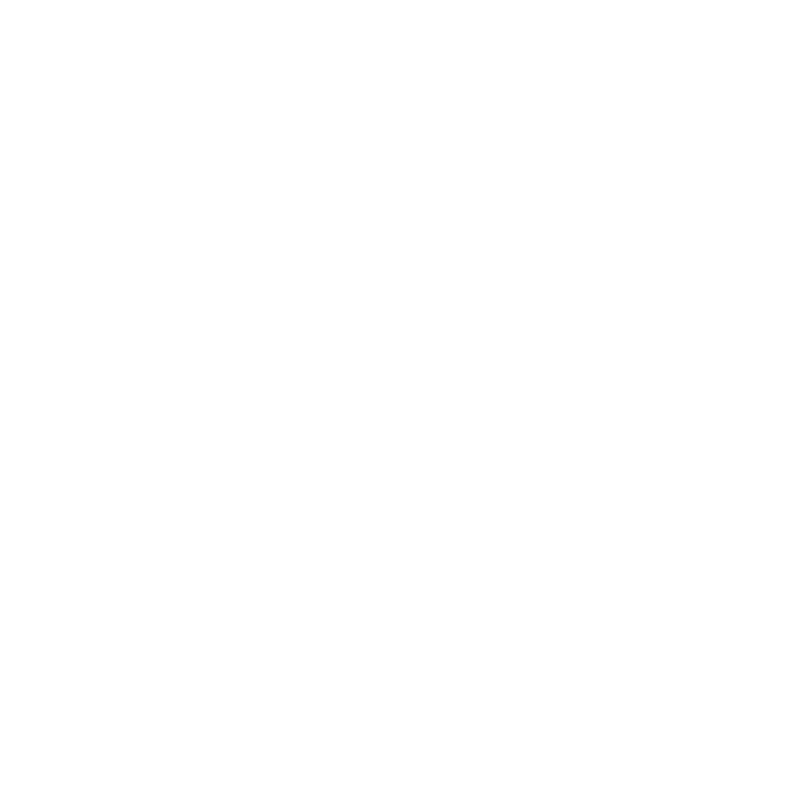

In [25]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
anim = animation.FuncAnimation(fig, drawParticles, frames=100, interval=20, blit=True)

In [26]:
rc('animation', html='html5')
anim

-8.361207543096373e-05
-4.237656101335885e-05
-0.00024353638592145536
-0.00013546000476831804
-7.320763196201351e-05
-0.00012623287712262778
-0.00043959165871105985
-0.00031020121703284885
-0.0002095231966572342
-0.00015287185619799665
-0.0002435274997370119
-0.0004789907218770428
-0.0005997912562135247
-0.0005537614261952518
-0.00046152551226206383
-0.0002490220303388549
-8.332591014627794e-05
8.332591014627794e-05
0.0002490220303388553
0.00046152551226206383
0.0005537614261952521
0.0005997912562135247
0.0004789907218770428
0.0002435274997370119
0.00015287185619799665
0.00020952319665723426
0.00031020121703284885
0.00043959165871105985
0.00012623287712262778
7.320763196201351e-05
0.00013546000476829902
0.0002435363859214305
4.237656101335885e-05
-7.190400673486918e-05
-0.00026694316071928517
-0.00013861372219339322
-0.00011715246178173434
-0.00025559126414092116
-0.0005139474703305605
-0.00016255199952441726
-0.00016436166691014662
-0.00020185909176269947
-0.0005537708795751933
-0.001

-1.5674123082407676e-06
-8.752239479493139e-07
-5.38601012476059e-06
-3.1948361376883693e-06
-1.4131409046150524e-06
-3.204494029348412e-06
-1.1044584122365768e-05
-5.669686545115585e-06
-3.367802239017225e-06
-2.5940129474857765e-06
-4.468829962988704e-06
-6.881963032446535e-06
-1.064944638933412e-05
-8.919484261553211e-06
-1.0458911695724547e-05
-4.597567574058824e-06
-1.5379930820506503e-06
1.5379930820506503e-06
4.597567574058832e-06
1.0458911695724547e-05
8.919484261553225e-06
1.064944638933412e-05
6.881963032446535e-06
4.468829962988704e-06
2.5940129474857765e-06
3.3678022390172265e-06
5.669686545115586e-06
1.1044584122365768e-05
3.204494029348412e-06
1.4131409046150524e-06
3.194836137684642e-06
5.3860101247568185e-06
8.752239479493139e-07
-1.0188112240579224e-06
-5.8816391798578306e-06
-2.7524717892416195e-06
-1.5715656786366564e-06
-4.573920223488655e-06
-7.57546860547286e-06
-5.53477879014317e-06
-2.6404773348597246e-06
-7.240780973966082e-06
-2.0174332365483714e-05
-1.6488851

-6.159157720833736e-10
-1.8414109338861038e-10
-5.375145270521802e-09
-1.927574299075507e-09
-6.521730773253841e-10
-1.935391861045937e-09
-4.2796870129276e-08
-1.2911727383523435e-08
-1.2015150188416084e-08
-7.010310020946956e-09
-1.726958258695482e-08
-6.037920697367646e-08
-1.1773082744007595e-07
-1.3071847545556412e-07
-1.653363954731341e-07
-7.093070695808485e-08
-2.242882634821585e-08
2.242882634821585e-08
7.093070695808497e-08
1.653363954731341e-07
1.307184754555642e-07
1.1773082744007595e-07
6.037920697367646e-08
1.726958258695482e-08
7.010310020946956e-09
1.2015150188416087e-08
1.2911727383523435e-08
4.2796870129276e-08
1.935391861045937e-09
6.521730773253841e-10
1.9275742866538506e-09
5.3751452700338075e-09
1.8414109338861038e-10
-7.915001162325058e-10
-8.130875217732823e-09
-2.3771306433806185e-09
-2.2480453596198686e-09
-6.854305453450995e-09
-5.186519348385878e-08
-5.771125989616055e-09
-6.493106858064937e-09
-1.0808626281549097e-08
-5.254191740947294e-08
-3.36340867748874

-1.2127102196036387e-13
-3.9468613362158057e-14
-1.3744404256927914e-12
-5.239187349320108e-13
-1.1070507595931151e-13
-8.257795555510565e-13
-1.0262724499737011e-11
-3.757264149883676e-12
-1.1104018224291124e-12
-1.1691668530148394e-12
-3.871898187952759e-12
-6.066288620568784e-12
-2.200708299371229e-11
-2.4020866374333856e-11
-2.9427144584984005e-11
-1.3950841739120868e-11
-4.787765420400034e-12
4.787765420400034e-12
1.3950841739120892e-11
2.9427144584984005e-11
2.4020866359037112e-11
2.200708299371229e-11
6.066288620568784e-12
3.871898187952759e-12
1.1691668530148394e-12
1.1104018224291128e-12
3.757264149883676e-12
1.0262724499737011e-11
8.257795555510565e-13
1.1070507595931151e-13
5.239211287029399e-13
1.3744407576576988e-12
3.9468613362158057e-14
-8.399073443962157e-14
-2.8305321956442346e-12
-4.588946399731315e-13
-1.251901141124223e-13
-1.862392274267788e-12
-6.307988639382696e-12
-2.1299488830913983e-12
-6.873013777647244e-13
-4.041012509657066e-12
-3.4731644510871527e-11
-2.83

-1.1826659063256544e-20
-8.21378352274441e-22
-1.3042698310222708e-18
-1.8879783041391115e-19
-2.0998291136468208e-20
-2.2160274646997167e-19
-1.186256721603634e-16
-1.1538410335468167e-17
-1.1592568765053468e-17
-3.203862102038105e-18
-2.6858131921320218e-17
-3.8591994973579133e-16
-1.8443290847720163e-15
-1.6694738994976425e-15
-4.206553391984369e-15
-1.2682577300193918e-15
-6.410035142663008e-16
6.410035142663008e-16
1.268257730019394e-15
4.206553391984369e-15
1.6694738904088161e-15
1.8443290847720163e-15
3.8591994973579133e-16
2.6858131921320218e-17
3.203862102038105e-18
1.1592568765053471e-17
1.1538410335468167e-17
1.186256721603634e-16
2.2160274646997167e-19
2.0998291136468208e-20
9.715330380097777e-20
7.309327535126819e-19
8.21378352274441e-22
-1.8542343749007318e-20
-1.4672636006977169e-18
-2.0209966641096106e-19
-1.3332306570386165e-19
-2.1084215834612274e-18
-8.762354211349376e-17
-1.870057090162851e-18
-1.8239733034648626e-18
-5.829014261083257e-18
-1.362659510072836e-16
-5.

-1.7810272960596873e-28
-1.8122428947112468e-29
-4.4705671363034773e-26
-3.821445185143497e-27
-3.3059080416404145e-28
-1.0192041639653144e-26
-2.3338996314783575e-24
-2.557941389071656e-25
-2.5783811451226954e-26
-6.112577423667293e-26
-7.922441308640968e-25
-1.3113935726800348e-24
-2.3336960440490133e-23
-5.612678229399896e-23
-1.0491264308725354e-22
-3.097253600879263e-23
-1.568241779381937e-23
1.568241779381937e-23
3.0972536008792675e-23
1.0491264308725354e-22
3.166707902715778e-23
2.3336960440490133e-23
1.3113935726800348e-24
7.922441308640968e-25
6.112577423667293e-26
2.578381145122696e-26
2.557941389071656e-25
2.3338996314783575e-24
1.0192041639653144e-26
3.3059080416404145e-28
6.2565939698997064e-27
4.2123243194721107e-26
1.8122428947112468e-29
-1.181094813583355e-28
-1.0874352960515675e-25
-2.7818626880888686e-27
-2.305558899660606e-28
-5.227840438546985e-26
-1.1801266213447278e-24
-8.812400729680541e-26
-9.034319766819307e-27
-3.5787835389079073e-25
-5.475518831892655e-23
-2.

-7.468294178012566e-43
-5.855982119756055e-45
-1.5373120574219554e-38
-4.510387425524051e-40
-5.458513980041634e-42
-7.3394491252494895e-40
-1.2170600902854927e-34
-2.2650362127971755e-36
-2.4800477806721493e-36
-1.176245800913932e-37
-1.0751874426043136e-35
-4.6490933035098034e-33
-1.2989178799547372e-31
-6.895570965502905e-32
-8.167323600853302e-31
-1.3926331742138272e-31
-8.84858337413828e-32
8.84858337413828e-32
1.3926331742138293e-31
8.167323600853302e-31
9.968934817616225e-32
1.2989178799547372e-31
4.6490933035098034e-33
1.0751874426043136e-35
1.176245800913932e-37
2.48004778067215e-36
2.2650362127971755e-36
1.2170600902854927e-34
7.3394491252494895e-40
5.458513980041634e-42
6.163819433370278e-41
3.926372146546514e-39
5.855982119756055e-45
-2.1626012160593618e-42
-1.7541633128000696e-38
-2.5462489748972166e-40
-1.1317912147513847e-40
-3.235173578418051e-38
-6.86658531792672e-35
-5.602882004340726e-38
-5.266972686263962e-38
-3.5655260085499786e-37
-3.1313141591856948e-34
-8.006583

-1.5729513011894247e-58
-9.743420962278935e-61
-8.502672950050845e-54
-5.113864347580387e-56
-7.449681634752357e-58
-6.792955931305443e-55
-2.637149125304303e-50
-2.9629631262248383e-52
-4.369610831312701e-54
-2.147567608767441e-53
-6.271646886276943e-51
-1.8898926789775297e-50
-6.670400002641753e-48
-5.337180438260363e-47
-2.0655833105741036e-46
-4.182699157947949e-47
-4.017609868689186e-47
4.017609868689186e-47
4.1826991579479556e-47
2.0655833105741036e-46
1.2435264765555175e-47
6.670400002641753e-48
1.8898926789775297e-50
6.271646886276943e-51
2.147567608767441e-53
4.3696108313127027e-54
2.9629631262248383e-52
2.637149125304303e-50
6.792955931305443e-55
7.449681634752357e-58
1.9619316570050147e-55
9.483063977592164e-54
9.743420962278935e-61
-4.266511638529852e-59
-4.214259428021831e-53
-2.771881134228853e-56
-3.256068088007712e-58
-1.0991310312054408e-53
-5.986693535028516e-51
-3.4609936130964764e-53
-5.530501367695523e-55
-1.0221976620180392e-51
-1.9782336136153807e-47
-3.009687711

-1.0880580770982344e-87
-6.921411961842668e-92
-3.9624276856461316e-79
-4.218627079362857e-82
-1.0236317650325946e-85
-1.739428693490301e-81
-5.9893572276011375e-71
-2.07310372458419e-74
-2.9992543117674293e-74
-5.480696033332876e-77
-4.356578818657992e-73
-1.0103053606977936e-67
-1.5567633867712065e-64
-2.9996345724646842e-65
-5.894625517197991e-63
-2.9317469567927854e-64
-3.365397018100543e-64
3.365397018100543e-64
2.93174695679279e-64
5.894625517197991e-63
6.108919589561219e-65
1.5567633867712065e-64
1.0103053606977936e-67
4.356578818657992e-73
5.480696033332876e-77
2.99925431176743e-74
2.07310372458419e-74
5.9893572276011375e-71
1.739428693490301e-81
1.0236317650325946e-85
6.081337818620955e-84
2.5896267880554188e-80
6.921411961842668e-92
-6.194108846504637e-87
-4.695729057005873e-79
-1.1461134336588523e-82
-4.044671736716643e-83
-2.276974557199668e-78
-1.6539795258739217e-71
-1.2845784062046752e-77
-1.1727530687900874e-77
-6.177784278584183e-76
-4.491654138262987e-70
-2.8272712761

-2.44988925541524e-119
-1.2211164027052638e-123
-5.369581104914133e-110
-4.147190446638607e-114
-4.993298174389822e-118
-6.580376727797632e-112
-9.012392987452813e-103
-1.1352399890186958e-106
-2.4421292237388952e-110
-1.3035468947364677e-108
-6.511228241031326e-104
-1.0854850289396195e-102
-1.2585315401050605e-97
-8.824857146411732e-96
-1.8668511660894903e-94
-1.7832505805311897e-95
-5.137179698262697e-95
5.137179698262697e-95
1.7832505805311924e-95
1.8668511660894903e-94
4.758897277669642e-97
1.2585315401050605e-97
1.0854850289396195e-102
6.511228241031326e-104
1.3035468947364677e-108
2.4421292237388958e-110
1.1352399890186958e-106
9.012392987452813e-103
6.580376727797632e-112
4.993298174389822e-118
3.7319167572179714e-113
8.711494422735078e-110
1.2211164027052638e-123
-1.3269787368874595e-120
-2.229356579313852e-108
-5.888494596677671e-115
-8.722371611539511e-119
-1.4983205533139635e-109
-5.3441381145884496e-104
-1.248865605061868e-108
-3.5923942956238475e-112
-1.7052257353392477e-1

-5.131846041047255e-178
-2.228025880752924e-186
-5.891207291313733e-161
-1.3019434453321031e-166
-5.172200718426429e-174
-1.6385811457865673e-165
-3.045753824343759e-144
-3.636817541407369e-151
-9.57254300325708e-151
-3.0674338602428286e-156
-2.1030372518777648e-148
-1.6925298556540542e-137
-5.087417071347815e-131
-2.5011810152911723e-132
-1.0155821781150475e-127
-4.605397837294687e-130
-1.3897951612484398e-129
1.3897951612484398e-129
4.605397837294694e-130
1.0155821781150475e-127
7.380058388867737e-132
5.087417071347815e-131
1.6925298556540542e-137
2.1030372518777648e-148
3.0674338602428286e-156
9.572543003257083e-151
3.636817541407369e-151
3.045753824343759e-144
1.6385811457865673e-165
5.172200718426429e-174
2.3414122267730487e-170
2.77406764609776e-163
2.228025880752924e-186
-1.2489256664585973e-176
-1.5279956943714614e-160
-7.722575316318542e-168
-1.2066345486322326e-168
-3.146876915941939e-159
-2.526169457481944e-145
-8.496399737040693e-158
-1.553866559134344e-157
-2.4206406174227

-1.0210100019426143e-241
-3.147684011212833e-250
-8.08185485056079e-223
-4.104813786116333e-231
-5.451171290893127e-239
-1.794772968685133e-226
-2.086480759000032e-208
-7.275145303602641e-216
-1.937269447674604e-223
-6.449520127813765e-220
-1.920588594940051e-210
-6.10929607665521e-208
-1.8903014310541366e-197
-1.031496756782308e-193
-7.191759446809344e-191
-5.702454610310873e-193
-2.8091890686667204e-191
2.8091890686667204e-191
5.702454610310883e-193
7.191759446809344e-191
2.0684988531523786e-196
1.8903014310541366e-197
6.10929607665521e-208
1.920588594940051e-210
6.449520127813765e-220
1.9372694476746046e-223
7.275145303602641e-216
2.086480759000032e-208
1.794772968685133e-226
5.451171290893127e-239
3.9556153439529226e-229
2.80820230570978e-222
3.147684011212833e-250
-4.8242725113129674e-244
-9.47260589544159e-220
-6.557019813236522e-233
-1.9504889708126434e-240
-5.943504287863935e-222
-8.344267297634551e-211
-7.940692945724702e-220
-4.300501704798196e-227
-9.224610398172045e-214
-1.

/tmp/ipykernel_25863/3674626808.py:11: RuntimeWarning: overflow encountered in scalar power
  self.r = self.pos[0]**2 + self.pos[1]**2+ self.pos[2]**2
/tmp/ipykernel_25863/3946702431.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return np.array([r*math.cos(theta), r*math.sin(theta), r*math.sin(r)])


-0.0


ValueError: math domain error

In [2]:
from manim import *

Manim Community v0.17.3

In [9]:
%%manim -ql ContinuousMotion

class ContinuousMotion(Scene):
    def construct(self):
        func = lambda pos: np.sin(pos[0] / 2) * UR + np.cos(pos[1] / 2) * LEFT
        stream_lines = StreamLines(func, stroke_width=3, max_anchors_per_line=100)
        self.add(stream_lines)
        stream_lines.start_animation(warm_up=False, flow_speed=1.5)
        self.wait(stream_lines.virtual_time / stream_lines.flow_speed)


[06/25/23 17:49:46] WARNING  It looks like the scene contains a lot of sub-mobjects. Caching is      ]8;id=214760;file:///home/vitor/Documents/projeto-calculo-3/venv/lib/python3.11/site-packages/manim/utils/hashing.py\hashing.py]8;;\:]8;id=700634;file:///home/vitor/Documents/projeto-calculo-3/venv/lib/python3.11/site-packages/manim/utils/hashing.py#158\158]8;;\
                             sometimes not suited to handle such large scenes, you might consider                  
                             disabling caching with --disable_caching to potentially speed up the                  
                             rendering process.                                                                    

                    WARNING  You can disable this warning by setting disable_caching_warning to True ]8;id=594463;file:///home/vitor/Documents/projeto-calculo-3/venv/lib/python3.11/site-packages/manim/utils/hashing.py\hashing.py]8;;\:]8;id=337243;file:///home/vitor/Documents/projeto-calculo-3/venv/lib/python3.11/site-packages/manim/utils/hashing.py#164\164]8;;\
                             in your config file.                                                                  

[06/25/23 17:54:38] INFO     Animation 0 : Partial movie file written in                   ]8;id=491243;file:///home/vitor/Documents/projeto-calculo-3/venv/lib/python3.11/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=962098;file:///home/vitor/Documents/projeto-calculo-3/venv/lib/python3.11/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/home/vitor/Documents/projeto-calculo-3/media/videos/projeto                         
                             -calculo-3/480p15/partial_movie_files/ContinuousMotion/426612                         
                             9954_1135846696_1088161321.mp4'                                                       

                    INFO     Combining to Movie file.                                      ]8;id=928037;file:///home/vitor/Documents/projeto-calculo-3/venv/lib/python3.11/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=735203;file:///home/vitor/Documents/projeto-calculo-3/venv/lib/python3.11/site-packages/manim/scene/scene_file_writer.py#617\617]8;;\

[06/25/23 17:54:39] INFO                                                                   ]8;id=67813;file:///home/vitor/Documents/projeto-calculo-3/venv/lib/python3.11/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=22638;file:///home/vitor/Documents/projeto-calculo-3/venv/lib/python3.11/site-packages/manim/scene/scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             '/home/vitor/Documents/projeto-calculo-3/media/videos/projeto                         
                             -calculo-3/480p15/ContinuousMotion.mp4'                                               
                                                                                                                   

                    INFO     Rendered ContinuousMotion                                                 ]8;id=487641;file:///home/vitor/Documents/projeto-calculo-3/venv/lib/python3.11/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=248952;file:///home/vitor/Documents/projeto-calculo-3/venv/lib/python3.11/site-packages/manim/scene/scene.py#241\241]8;;\
                             Played 1 animations                                                                   

In [11]:
%%manim -ql FluidSimulation


class FluidSimulation(Scene):
    def construct(self):
        # Set simulation parameters
        width = 10
        height = 6
        num_particles = 100
        dt = 0.1
        
        # Create container rectangle
        container = Rectangle(width=width, height=height, color=BLUE, fill_opacity=0.2)
        
        # Create particles
        particles = []
        for _ in range(num_particles):
            particle = Circle(radius=0.1, color=WHITE, fill_opacity=1)
            particle.move_to(np.random.uniform(-width/2, width/2), np.random.uniform(-height/2, height/2), 0)
            particles.append(particle)
        
        # Update function for particle motion
        def update_particle(particle, dt):
            velocity = particle.get_center() / np.linalg.norm(particle.get_center())  # Velocity direction towards the origin
            displacement = velocity * dt  # Displacement vector
            particle.move_to(particle.get_center() + displacement)  # Update particle position
        
        # Animation loop
        self.play(Create(container))
        self.play(*[Create(particle) for particle in particles])
        self.wait(1)
        
        for _ in range(100):
            self.play(*[UpdateFromFunc(particle, update_particle, dt) for particle in particles])
        
        self.wait(1)

TypeError: 'float' object is not subscriptable